<a href="https://colab.research.google.com/github/botcaps/Credit-Risk/blob/main/Credit_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Data Collection & Cleaning*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pd.options.display.max_columns = None

In [4]:
df = pd.read_csv('/content/drive/MyDrive/loan.csv')


In [5]:
#transform the data df in parquet file
df.to_parquet('/content/drive/MyDrive/loan.parquet')

In [6]:
#5 record of the dataset
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(887379, 74)

In [8]:
# Loop through each column in the DataFrame 'df'
for i in df.columns:
    # Print the column name (i) and its data type as a dictionary
    print({i: df[i].dtypes})


{'id': dtype('int64')}
{'member_id': dtype('int64')}
{'loan_amnt': dtype('float64')}
{'funded_amnt': dtype('float64')}
{'funded_amnt_inv': dtype('float64')}
{'term': dtype('O')}
{'int_rate': dtype('float64')}
{'installment': dtype('float64')}
{'grade': dtype('O')}
{'sub_grade': dtype('O')}
{'emp_title': dtype('O')}
{'emp_length': dtype('O')}
{'home_ownership': dtype('O')}
{'annual_inc': dtype('float64')}
{'verification_status': dtype('O')}
{'issue_d': dtype('O')}
{'loan_status': dtype('O')}
{'pymnt_plan': dtype('O')}
{'url': dtype('O')}
{'desc': dtype('O')}
{'purpose': dtype('O')}
{'title': dtype('O')}
{'zip_code': dtype('O')}
{'addr_state': dtype('O')}
{'dti': dtype('float64')}
{'delinq_2yrs': dtype('float64')}
{'earliest_cr_line': dtype('O')}
{'inq_last_6mths': dtype('float64')}
{'mths_since_last_delinq': dtype('float64')}
{'mths_since_last_record': dtype('float64')}
{'open_acc': dtype('float64')}
{'pub_rec': dtype('float64')}
{'revol_bal': dtype('float64')}
{'revol_util': dtype('flo

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [10]:
# Loop through each column in the DataFrame 'df'
for i in df.columns:
    # Print the column name (i) and the number of unique values in that column as a dictionary
    print({i: df[i].nunique()})

{'id': 887379}
{'member_id': 887379}
{'loan_amnt': 1372}
{'funded_amnt': 1372}
{'funded_amnt_inv': 9856}
{'term': 2}
{'int_rate': 542}
{'installment': 68711}
{'grade': 7}
{'sub_grade': 35}
{'emp_title': 299271}
{'emp_length': 11}
{'home_ownership': 6}
{'annual_inc': 49384}
{'verification_status': 3}
{'issue_d': 103}
{'loan_status': 10}
{'pymnt_plan': 2}
{'url': 887379}
{'desc': 124468}
{'purpose': 14}
{'title': 63143}
{'zip_code': 935}
{'addr_state': 51}
{'dti': 4086}
{'delinq_2yrs': 29}
{'earliest_cr_line': 697}
{'inq_last_6mths': 28}
{'mths_since_last_delinq': 155}
{'mths_since_last_record': 123}
{'open_acc': 77}
{'pub_rec': 32}
{'revol_bal': 73740}
{'revol_util': 1356}
{'total_acc': 135}
{'initial_list_status': 2}
{'out_prncp': 248332}
{'out_prncp_inv': 266244}
{'total_pymnt': 506726}
{'total_pymnt_inv': 506616}
{'total_rec_prncp': 260227}
{'total_rec_int': 324635}
{'total_rec_late_fee': 6181}
{'recoveries': 23055}
{'collection_recovery_fee': 20708}
{'last_pymnt_d': 98}
{'last_pymnt

In [11]:
# Identify numerical features: Select column names where the data type is not object ('O')
numerical_features = [i for i in df.columns if df[i].dtypes != 'O']

# Identify categorical features: Select column names where the data type is object ('O')
categorical_features = [i for i in df.columns if df[i].dtypes == 'O']

# Print the list of numerical features
print('Numerical features:', numerical_features)

# Print the list of categorical features
print('Categorical features:', categorical_features)

Numerical features: ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']
Categorical features: ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymn

In [12]:
# Calculate and print the number of categorical features
print('Number of categorical_features:', len(categorical_features))

# Calculate the number of numerical features
num_numerical_features = len(numerical_features)

# Print the number of numerical features using an f-string for formatting
print(f"Number of numerical features: {num_numerical_features}")


Number of categorical_features: 23
Number of numerical features: 51


In [13]:
for i in df.columns:
  print({i: df['emp_title'].unique()})

{'id': array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'machining Cell Lead',
       'KYC Business Analyst', 'Manager Hotel Operations Oasis '],
      dtype=object)}
{'member_id': array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'machining Cell Lead',
       'KYC Business Analyst', 'Manager Hotel Operations Oasis '],
      dtype=object)}
{'loan_amnt': array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'machining Cell Lead',
       'KYC Business Analyst', 'Manager Hotel Operations Oasis '],
      dtype=object)}
{'funded_amnt': array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'machining Cell Lead',
       'KYC Business Analyst', 'Manager Hotel Operations Oasis '],
      dtype=object)}
{'funded_amnt_inv': array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'machining Cell Lead',
       'KYC Business Analyst', 'Manager Hotel Operations Oasis '],
      dtype=object)}
{'term': array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'machining Cell Lead',
       'KYC Business Analyst', 'Manager Hotel Op

In [14]:
# Calculate the percentage of missing values for each column
missing_values = (df.isnull().sum() / len(df)) * 100

# Iterate through columns with missing values (greater than 0), sorted in descending order of missing percentage
for i in missing_values[missing_values > 0].sort_values(ascending=False).index:
    # Print the column name and its percentage of missing values
    print(f"{i}: {missing_values[i]:.2f}%")


dti_joint: 99.94%
annual_inc_joint: 99.94%
verification_status_joint: 99.94%
il_util: 97.90%
mths_since_rcnt_il: 97.65%
total_cu_tl: 97.59%
inq_fi: 97.59%
all_util: 97.59%
max_bal_bc: 97.59%
open_rv_24m: 97.59%
open_rv_12m: 97.59%
total_bal_il: 97.59%
open_il_24m: 97.59%
open_il_12m: 97.59%
open_il_6m: 97.59%
open_acc_6m: 97.59%
inq_last_12m: 97.59%
desc: 85.80%
mths_since_last_record: 84.56%
mths_since_last_major_derog: 75.02%
mths_since_last_delinq: 51.20%
next_pymnt_d: 28.51%
total_rev_hi_lim: 7.92%
tot_coll_amt: 7.92%
tot_cur_bal: 7.92%
emp_title: 5.80%
emp_length: 5.05%
last_pymnt_d: 1.99%
revol_util: 0.06%
title: 0.02%
collections_12_mths_ex_med: 0.02%
last_credit_pull_d: 0.01%
open_acc: 0.00%
inq_last_6mths: 0.00%
earliest_cr_line: 0.00%
delinq_2yrs: 0.00%
total_acc: 0.00%
acc_now_delinq: 0.00%
pub_rec: 0.00%
annual_inc: 0.00%


Maximum number of missing value belong to dti joint and minimum is annual_inc

In [15]:
# Identify columns with more than 70% missing values
columns_to_drop = missing_values[missing_values > 70].index

# Print the names of columns to drop
print(columns_to_drop)

Index(['desc', 'mths_since_last_record', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'],
      dtype='object')


In [16]:
# drop the column which have more than 70% of the data is missing
df.drop(columns_to_drop , axis=1, inplace=True)

In [17]:
#print categorical feature unique value
for i in categorical_features:
  print(i)


term
grade
sub_grade
emp_title
emp_length
home_ownership
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
earliest_cr_line
initial_list_status
last_pymnt_d
next_pymnt_d
last_credit_pull_d
application_type
verification_status_joint


In [18]:
for i in df.columns:
  print({i: df[i].nunique()})

{'id': 887379}
{'member_id': 887379}
{'loan_amnt': 1372}
{'funded_amnt': 1372}
{'funded_amnt_inv': 9856}
{'term': 2}
{'int_rate': 542}
{'installment': 68711}
{'grade': 7}
{'sub_grade': 35}
{'emp_title': 299271}
{'emp_length': 11}
{'home_ownership': 6}
{'annual_inc': 49384}
{'verification_status': 3}
{'issue_d': 103}
{'loan_status': 10}
{'pymnt_plan': 2}
{'url': 887379}
{'purpose': 14}
{'title': 63143}
{'zip_code': 935}
{'addr_state': 51}
{'dti': 4086}
{'delinq_2yrs': 29}
{'earliest_cr_line': 697}
{'inq_last_6mths': 28}
{'mths_since_last_delinq': 155}
{'open_acc': 77}
{'pub_rec': 32}
{'revol_bal': 73740}
{'revol_util': 1356}
{'total_acc': 135}
{'initial_list_status': 2}
{'out_prncp': 248332}
{'out_prncp_inv': 266244}
{'total_pymnt': 506726}
{'total_pymnt_inv': 506616}
{'total_rec_prncp': 260227}
{'total_rec_int': 324635}
{'total_rec_late_fee': 6181}
{'recoveries': 23055}
{'collection_recovery_fee': 20708}
{'last_pymnt_d': 98}
{'last_pymnt_amnt': 232451}
{'next_pymnt_d': 100}
{'last_cred

In [19]:
#Remove the column which is not required

df.drop(['member_id','emp_title','title','url','zip_code','sub_grade','policy_code'], axis=1, inplace=True)

In [20]:
# Target value
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [21]:
# Define a mapping dictionary to transform the 'loan_status' column
# 1 indicates a "good" loan status, and 0 indicates "others"
mapping = {
    'Fully Paid': 1,
    'Current': 1,
    'In Grace Period': 1,
    'Charged Off': 0,
    'Default': 0,
    'Late (31-120 days)': 0,
    'Late (16-30 days)': 0,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Does not meet the credit policy. Status:Charged Off': 0,
    'Issued': 0
}

# Transform the 'loan_status' column using the defined mapping
# Replace values in 'loan_status' with their corresponding values from the mapping
df['loan_status'] = df['loan_status'].replace(mapping)


In [22]:
#outlier of the data
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,887379.0,3.246513e+07,2.282734e+07,54734.00,9206643.000,3.443327e+07,5.490814e+07,6.861706e+07
loan_amnt,887379.0,1.475526e+04,8.435456e+03,500.00,8000.000,1.300000e+04,2.000000e+04,3.500000e+04
funded_amnt,887379.0,1.474188e+04,8.429898e+03,500.00,8000.000,1.300000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,887379.0,1.470246e+04,8.442107e+03,0.00,8000.000,1.300000e+04,2.000000e+04,3.500000e+04
int_rate,887379.0,1.324674e+01,4.381867e+00,5.32,9.990,1.299000e+01,1.620000e+01,2.899000e+01
installment,887379.0,4.367171e+02,2.441866e+02,15.67,260.705,3.825500e+02,5.726000e+02,1.445460e+03
annual_inc,887375.0,7.502759e+04,6.469830e+04,0.00,45000.000,6.500000e+04,9.000000e+04,9.500000e+06
loan_status,887379.0,9.192859e-01,2.723957e-01,0.00,1.000,1.000000e+00,1.000000e+00,1.000000e+00
dti,887379.0,1.815704e+01,1.719063e+01,0.00,11.910,1.765000e+01,2.395000e+01,9.999000e+03
delinq_2yrs,887350.0,3.144419e-01,8.622438e-01,0.00,0.000,0.000000e+00,0.000000e+00,3.900000e+01


In [23]:
def detect_outlier(column_name):
    # Calculate the first quartile (Q1) for the specified column
    Q1 = df[column_name].quantile(0.25)

    # Calculate the third quartile (Q3) for the specified column
    Q3 = df[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Determine the lower whisker (minimum threshold for non-outliers)
    lower_whisker = Q1 - 1.5 * IQR

    # Determine the upper whisker (maximum threshold for non-outliers)
    upper_whisker = Q3 + 1.5 * IQR

    # Iterate through each value in the column
    for entry in df[column_name]:
        # Check if the entry is an outlier (below lower whisker or above upper whisker)
        if entry > upper_whisker or entry < lower_whisker:
            return 'YES'  # Outlier detected, return 'YES'

    return 'NO'  # No outliers detected, return 'NO'


In [24]:
# Select numerical columns (integer and float types) from the DataFrame
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Exclude the target variable 'loan_status' from the numerical columns
numerical_cols = numerical_cols.drop('loan_status', axis=1)

# Initialize an empty list to store columns with outliers
outlier_cols = []

# Iterate through each column in the numerical columns
for col in numerical_cols.columns:
    # Use the detect_outlier function to check for outliers in the column
    if detect_outlier(col) == 'YES':
        # If outliers are found, add the column name to the outlier_cols list
        outlier_cols.append(col)


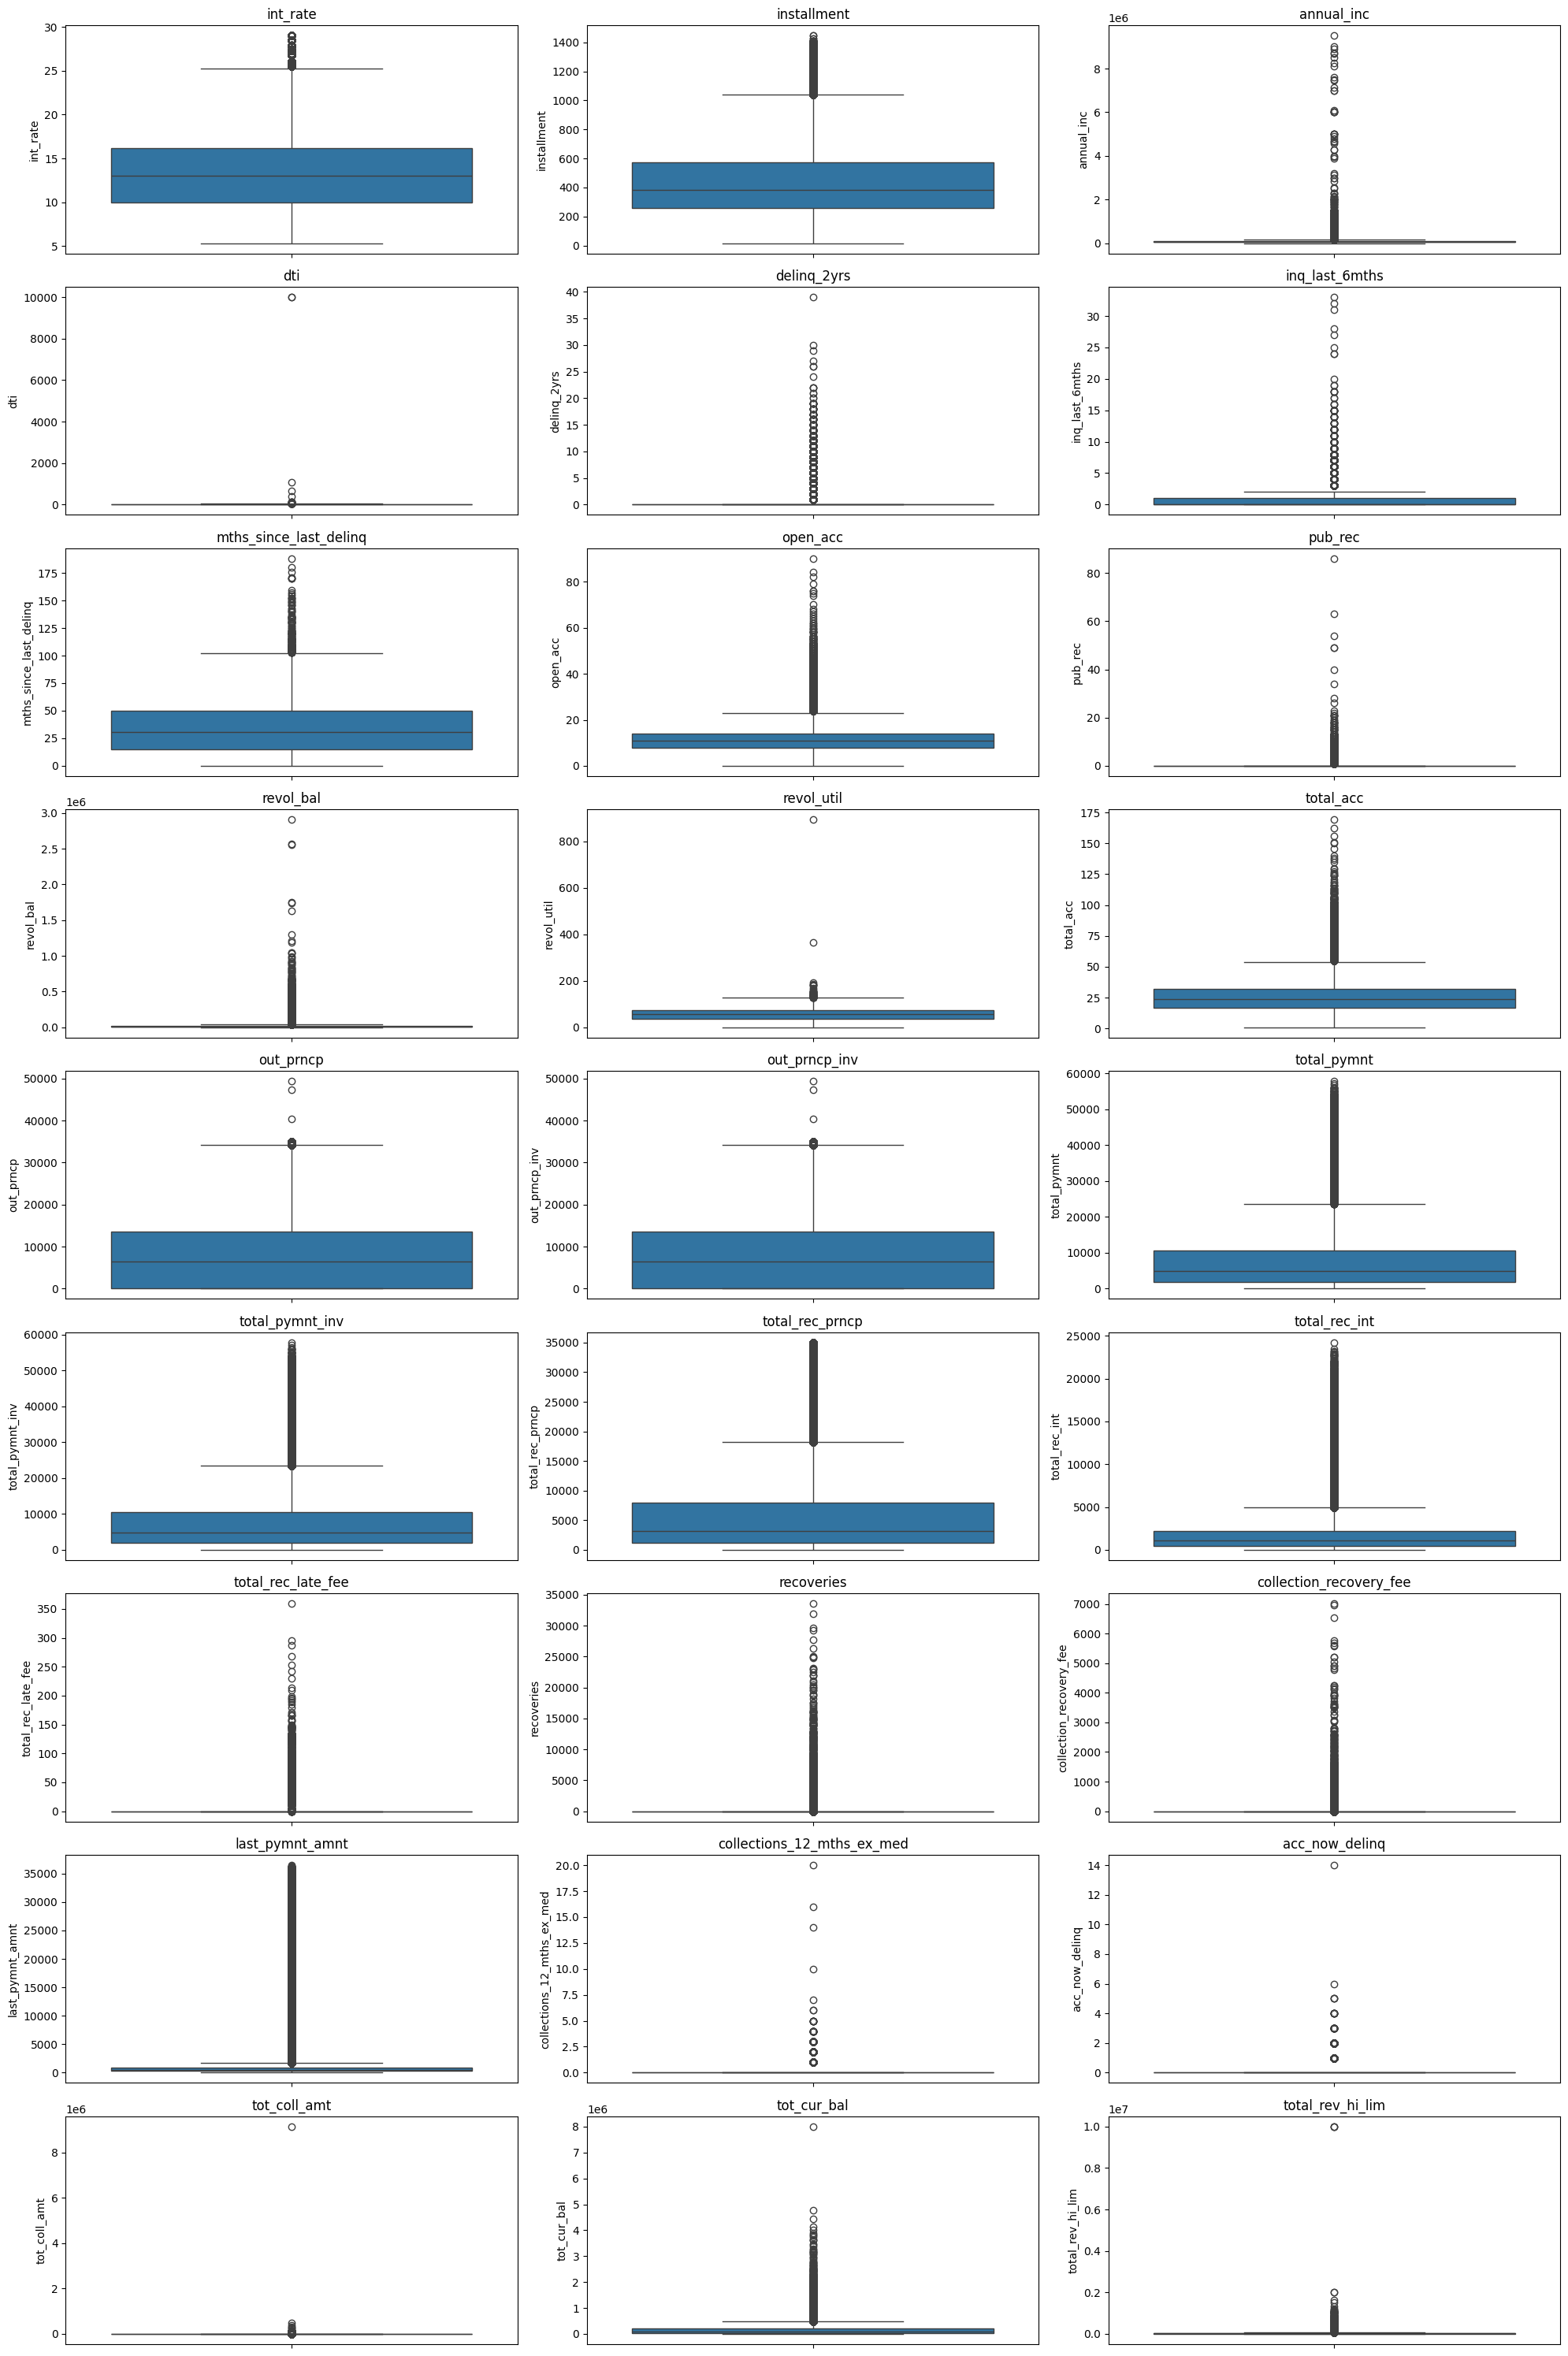

In [25]:
# Create a grid of subplots with 9 rows and 3 columns
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(20, 30))

# Iterate over each subplot and outlier column
for i, ax in enumerate(axes.flat):  # Flatten the 2D array of axes for easy iteration
    if i < len(outlier_cols):  # Check if the current index is within the range of outlier columns
        column_name = outlier_cols[i]  # Get the column name from the outlier_cols list
        # Create a boxplot for the current column
        sns.boxplot(y=column_name, data=df, ax=ax)
        # Set the title of the subplot to the column name
        ax.set_title(column_name)

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()


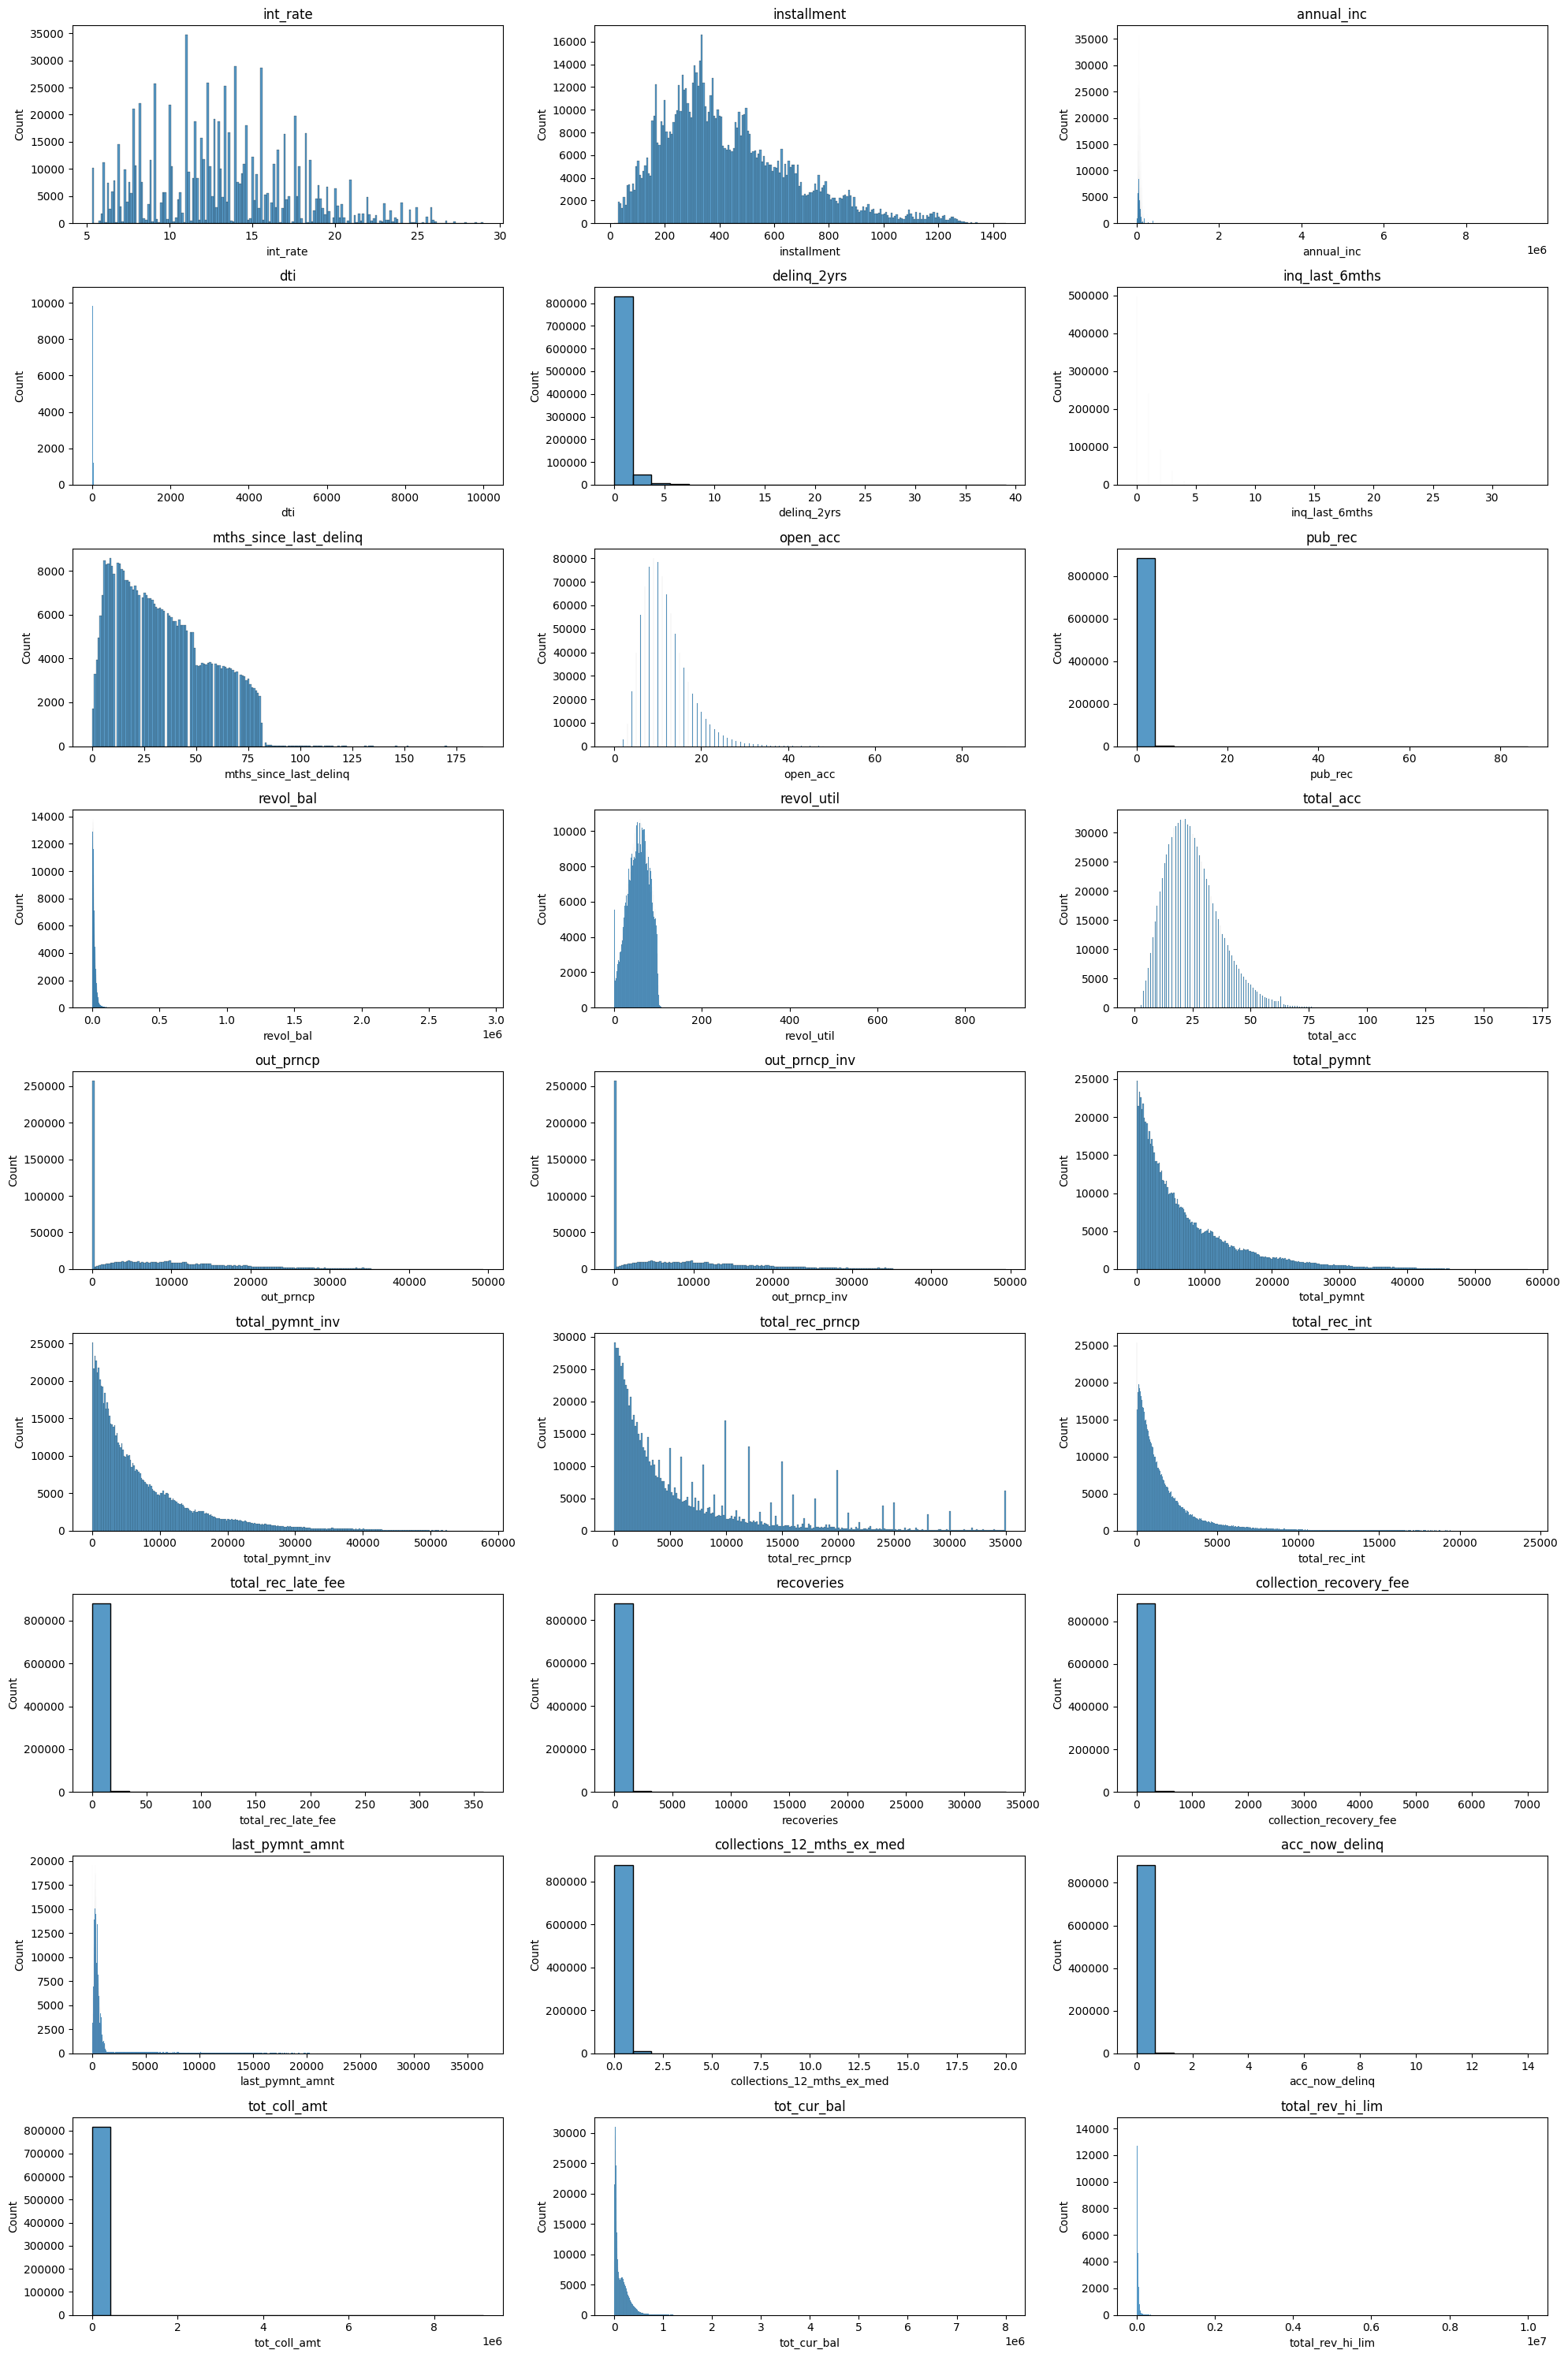

In [26]:
# Create a grid of subplots with 9 rows and 3 columns
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(20, 30))

# Iterate over each subplot and outlier column
for i, ax in enumerate(axes.flat):  # Flatten the 2D array of axes for easy iteration
    if i < len(outlier_cols):  # Check if the current index is within the range of outlier columns
        column_name = outlier_cols[i]  # Get the column name from the outlier_cols list
        # Create a histogram plot for the current column
        sns.histplot(x=column_name, data=df, ax=ax)
        # Set the title of the subplot to the column name
        ax.set_title(column_name)

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()


In [27]:
# Delete error value in 'dti'
df.drop(df[df['dti'] > 8000].index, inplace=True)

In [28]:
# Delete error value in 'revol_util'
df.drop(df[df['revol_util'] > 300].index, inplace=True)

# *Data Preprocessing*

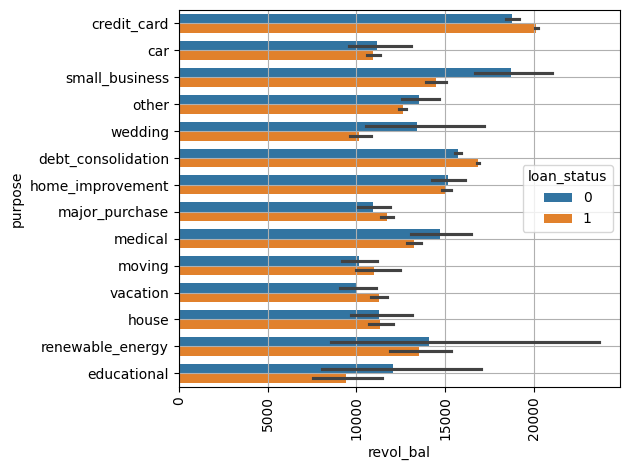

In [29]:
# Create a horizontal bar plot to compare 'revol_bal' (revolving balance) by 'purpose' and 'loan_status'
sns.barplot(
    x="revol_bal",   # Set 'revol_bal' (revolving balance) as the x-axis
    y="purpose",     # Set 'purpose' as the y-axis (categorical variable)
    hue="loan_status",  # Use 'loan_status' to differentiate bars with different colors
    data=df,         # Use data from the DataFrame 'df'
    width=0.7,       # Set the width of the bars
    dodge=True,      # Separate bars for different hues (loan_status)
    orient='h'       # Set the orientation to horizontal
)

# Rotate the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Add a grid to the plot for better visual clarity
plt.grid()

# Adjust the layout to ensure that all elements fit properly without overlap
plt.tight_layout()


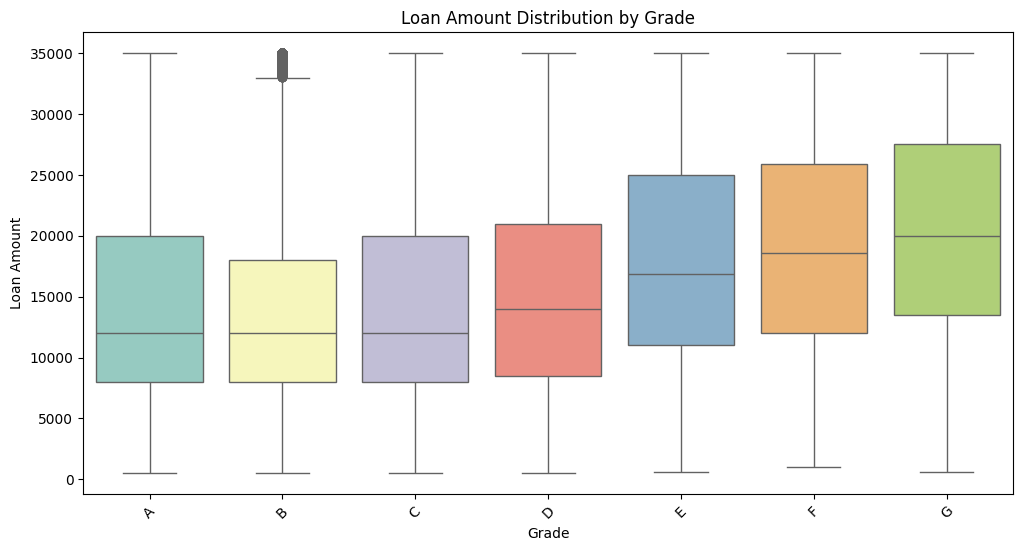

In [30]:
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

plt.figure(figsize=(12, 6))
sns.boxplot(x='grade', y='loan_amnt', data=df, palette='Set3',order=grade_order)
plt.title('Loan Amount Distribution by Grade')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()


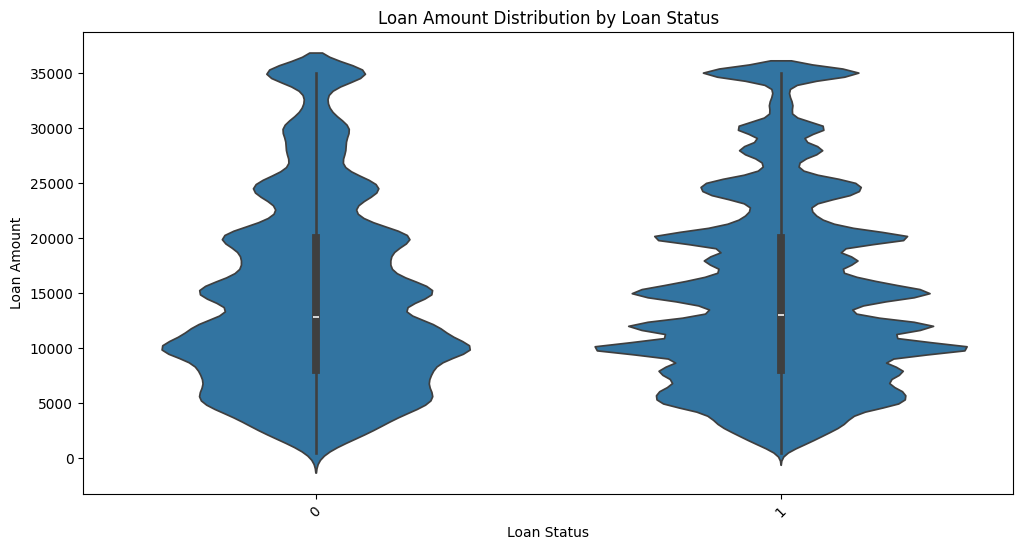

In [31]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='loan_status', y='loan_amnt', data=df)
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

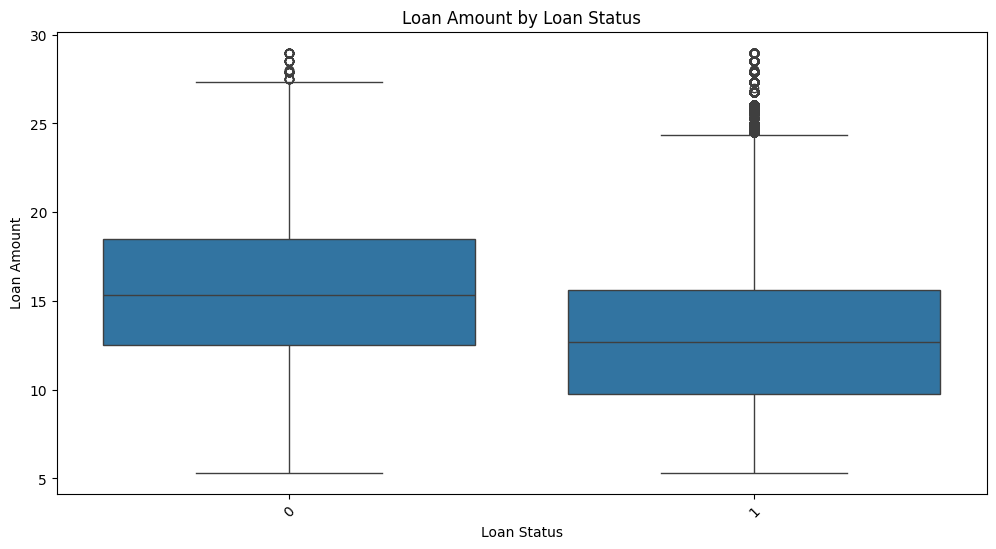

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='int_rate', data=df)
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

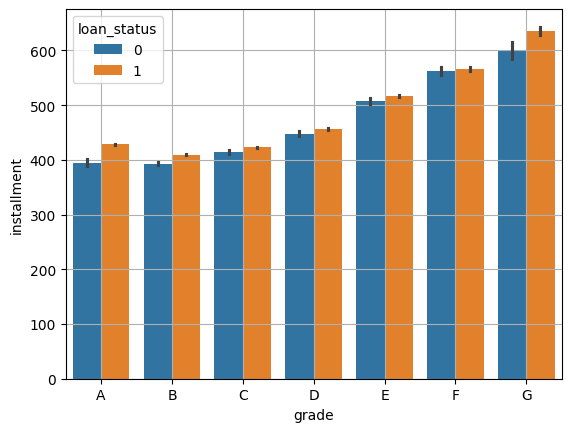

In [33]:
# Create a bar plot to visualize 'installment' by 'grade' and 'loan_status'
sns.barplot(
    x='grade',             # Set 'grade' as the x-axis (categorical variable for loan grades)
    y='installment',       # Set 'installment' as the y-axis (numerical variable for loan installment amount)
    hue='loan_status',     # Use 'loan_status' to differentiate the bars by loan status (different colors)
    data=df,               # Use data from the DataFrame 'df'
    order=['A', 'B', 'C', 'D', 'E', 'F', 'G']  # Order the categories of 'grade' from 'A' to 'G'
)

# Add a grid to the plot for better visual clarity
plt.grid()


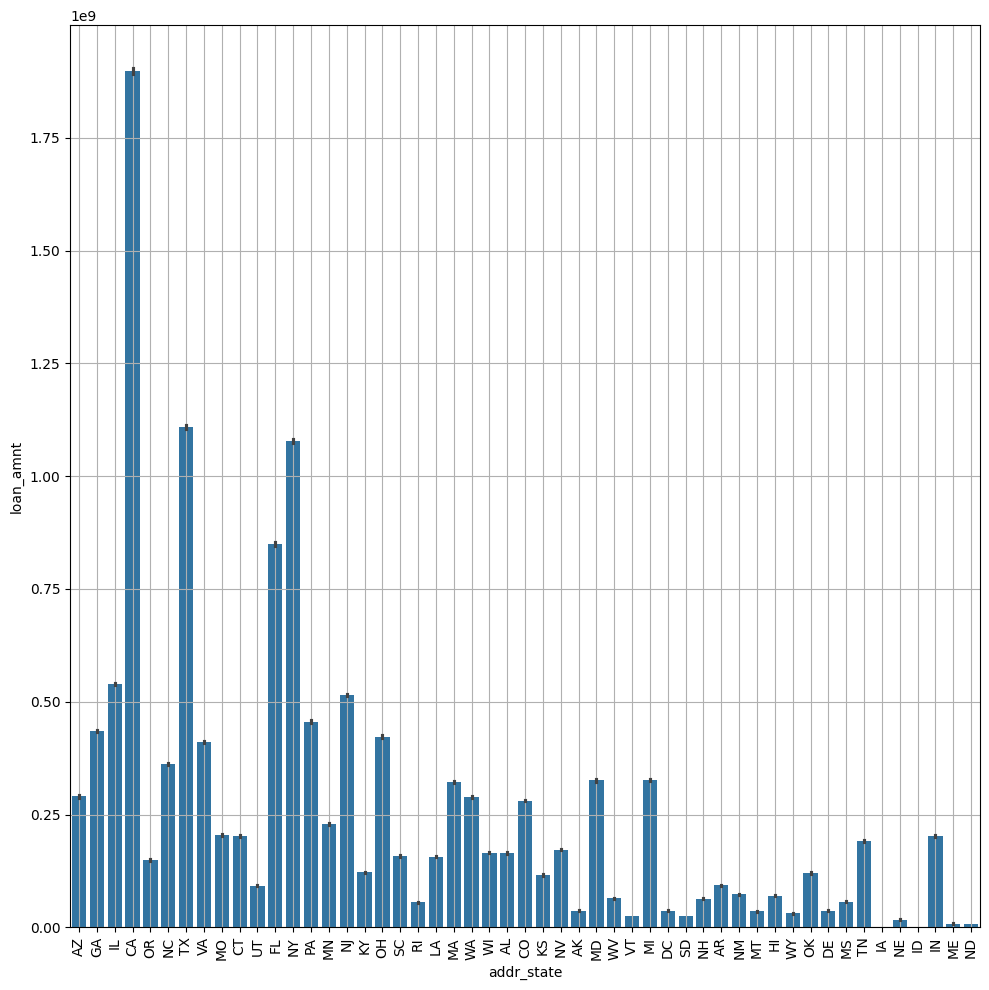

In [34]:
# Set the figure size for the plot
plt.figure(figsize=(10,10))

# Create a bar plot to visualize the sum of loan amounts by state
sns.barplot(
    x='addr_state',       # Set 'addr_state' (address state) as the x-axis (categorical variable)
    y='loan_amnt',        # Set 'loan_amnt' (loan amount) as the y-axis (numerical variable)
    estimator='sum',      # Calculate the sum of loan amounts for each state
    data=df,              # Use data from the DataFrame 'df'
    width=0.8,            # Set the width of the bars
    dodge=True            # Separate bars by different categories if applicable (not relevant here as no hue is provided)
)

# Rotate the x-axis labels by 90 degrees to ensure readability
plt.xticks(rotation=90)

# Add a grid to the plot for better visual clarity
plt.grid()

# Adjust the layout to ensure that all elements fit properly without overlap
plt.tight_layout()


<Axes: xlabel='loan_amnt', ylabel='total_pymnt'>

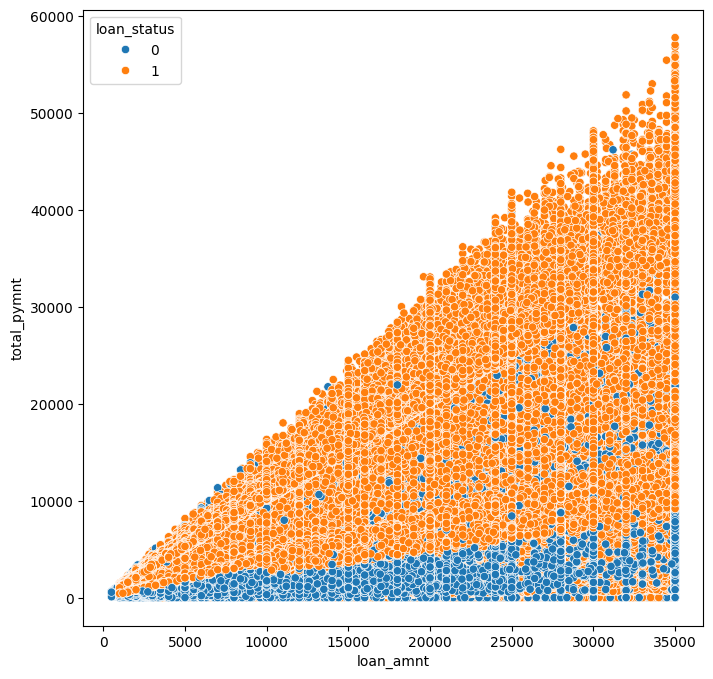

In [35]:
# Set the figure size for the plot
plt.figure(figsize=(8, 8))

# Create a scatter plot to visualize the relationship between loan amount and total payment
sns.scatterplot(
    x='loan_amnt',       # Set 'loan_amnt' (loan amount) as the x-axis
    y='total_pymnt',     # Set 'total_pymnt' (total payment) as the y-axis
    hue='loan_status',   # Use 'loan_status' to differentiate the points by loan status (different colors)
    data=df              # Use data from the DataFrame 'df'
)


<Axes: >

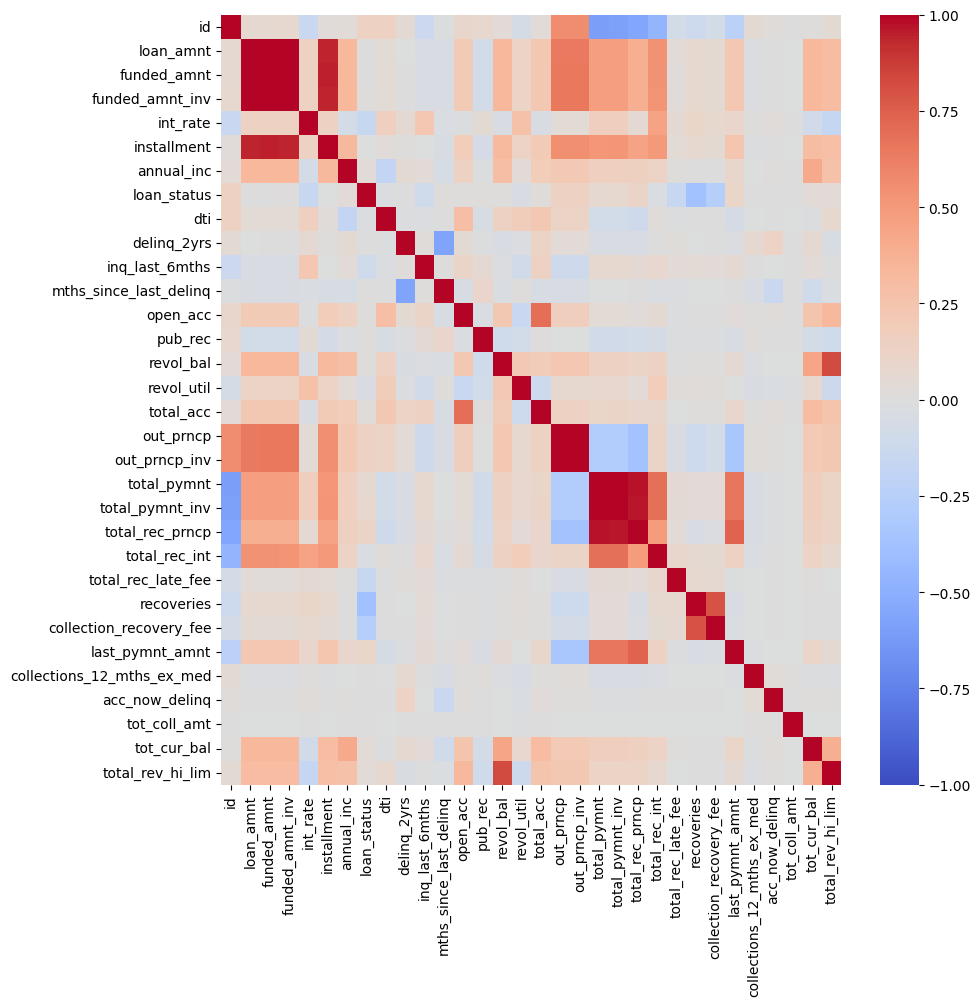

In [36]:
corr_df = df.select_dtypes(include=['int','float']).corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_df,vmin=-1,vmax=1,cmap='coolwarm')

In [37]:
# Create an upper triangular matrix of absolute correlation values
# - `corr_df.abs()`: Takes the absolute value of the correlation matrix.
# - `np.triu(np.ones(corr_df.shape), k=1)`: Creates an upper triangular mask with 1s above the diagonal (k=1 excludes the diagonal).
# - `.astype(np.bool_)`: Converts the mask to boolean type.
# - `.where(...)`: Applies the mask to the correlation matrix, keeping only the upper triangular part.
upper = corr_df.abs().where(np.triu(np.ones(corr_df.shape), k=1).astype(np.bool_))

# Identify columns with high correlation (> 0.7) in the upper triangular matrix
# - Iterate over each column in the `upper` matrix.
# - Check if any correlation value in the column exceeds 0.7.
# - If so, add the column name to the list `to_drop_hicorr`.
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [38]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'total_rev_hi_lim']

In [39]:
df.drop(to_drop_hicorr, axis=1, inplace=True)

# *Feature Engineering*

In [40]:
# Remove any non-digit characters from the 'term' column (e.g., '36 months' -> '36')
df['term'] = df['term'].str.replace(r"[^\d+]", "", regex=True)

# Convert the 'term' column to numeric, invalid parsing will be set as NaN
df['term'] = pd.to_numeric(df['term'], errors='coerce')

# Convert the 'term' column to integer type (ignores NaN values)
df['term'] = df['term'].astype(int)


In [41]:
# Replace the value '10+ years' with 10 in the 'emp_length' column
df['emp_length'] = df['emp_length'].replace(to_replace='10+ years', value=10)

# Replace the value '< 1 year' with 0 in the 'emp_length' column (indicating no employment or less than 1 year)
df['emp_length'] = df['emp_length'].replace(to_replace='< 1 year', value=0)

# Remove the substring '.years' from the 'emp_length' column (in case there are any entries like '3 years')
df['emp_length'] = df['emp_length'].replace(to_replace='.years', value='', regex=True)

# Remove the substring '.year' from the 'emp_length' column (in case there are any entries like '1 year')
df['emp_length'] = df['emp_length'].replace(to_replace='.year', value='', regex=True)

# Convert the 'emp_length' column to a float type
df['emp_length'] = df['emp_length'].astype('float')


In [42]:
# Drop the 'loan_status' column from the dataframe to create the feature matrix 'X'
X = df.drop('loan_status', axis=1)

# Assign the 'loan_status' column as the target variable 'y'
y = df['loan_status']


In [43]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,                  # Features (input data)
    y,                  # Target variable (labels)
    random_state=42,    # Set a fixed seed for reproducibility of results
    stratify=y          # Ensure that the proportion of classes in 'y' is maintained in both train and test sets
)


In [44]:
# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int', 'float']).columns  # Numerical columns
cat_cols = X.select_dtypes(include='object').columns          # Categorical columns

# Check if there are any numerical columns
if len(num_cols) > 0:
    # Initialize the SimpleImputer for numerical columns with median strategy
    imputer_numerical = SimpleImputer(strategy='median')

    # Fit the imputer on the training data (numerical columns)
    imputer_numerical.fit(X_train[num_cols])

    # Apply the imputation (fill missing values with the median) on both training and test sets
    X_train.loc[:, num_cols] = imputer_numerical.transform(X_train[num_cols])
    X_test.loc[:, num_cols] = imputer_numerical.transform(X_test[num_cols])

# Check if there are any categorical columns
if len(cat_cols) > 0:
    # Initialize the SimpleImputer for categorical columns with most frequent strategy
    imputer_categorical = SimpleImputer(strategy='most_frequent')

    # Fit the imputer on the training data (categorical columns)
    imputer_categorical.fit(X_train[cat_cols])

    # Apply the imputation (fill missing values with the most frequent value) on both training and test sets
    X_train.loc[:, cat_cols] = imputer_categorical.transform(X_train[cat_cols])
    X_test.loc[:, cat_cols] = imputer_categorical.transform(X_test[cat_cols])



In [45]:
X_train[cat_cols].head()

,grade,home_ownership,verification_status,issue_d,pymnt_plan,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
386872,C,OWN,Verified,May-2014,n,house,OR,Oct-1980,f,Apr-2015,Feb-2016,Jan-2016,INDIVIDUAL
819462,D,MORTGAGE,Verified,Mar-2015,n,debt_consolidation,AZ,Jan-2000,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL
239305,E,OWN,Verified,Dec-2014,n,home_improvement,CA,Sep-1981,w,Jan-2016,Feb-2016,Dec-2015,INDIVIDUAL
236592,C,MORTGAGE,Not Verified,Dec-2014,n,debt_consolidation,MD,Oct-1993,f,Aug-2015,Feb-2016,Aug-2015,INDIVIDUAL
834501,A,MORTGAGE,Source Verified,Feb-2015,n,debt_consolidation,CA,Mar-1982,w,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL


In [46]:
# List of columns that contain date values
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

# Iterate through each date column
for col in date_cols:
    # Convert the date columns to datetime format in both training and test sets
    # The format='%b-%Y' indicates that the date is in the format of abbreviated month and year (e.g., 'Jan-2020')
    X_train[col] = pd.to_datetime(X_train[col], format='%b-%Y')
    X_test[col] = pd.to_datetime(X_test[col], format='%b-%Y')


In [47]:
X_train[date_cols]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
386872,2014-05-01,1980-10-01,2015-04-01,2016-02-01,2016-01-01
819462,2015-03-01,2000-01-01,2016-01-01,2016-02-01,2016-01-01
239305,2014-12-01,1981-09-01,2016-01-01,2016-02-01,2015-12-01
236592,2014-12-01,1993-10-01,2015-08-01,2016-02-01,2015-08-01
834501,2015-02-01,1982-03-01,2016-01-01,2016-02-01,2016-01-01
...,...,...,...,...,...
76009,2013-10-01,2007-05-01,2014-07-01,2016-02-01,2014-12-01
284680,2014-10-01,2000-08-01,2016-01-01,2016-02-01,2016-01-01
517885,2015-11-01,1995-10-01,2016-01-01,2016-02-01,2016-01-01
249519,2014-11-01,2000-08-01,2016-01-01,2016-02-01,2016-01-01


In [48]:
X_train[['last_pymnt_d','last_credit_pull_d']].corr()

,last_pymnt_d,last_credit_pull_d
last_pymnt_d,1.000000,0.730067
last_credit_pull_d,0.730067,1.000000


In [49]:
# Drop the 'last_credit_pull_d' column from both the training and test datasets
X_train.drop('last_credit_pull_d', axis=1, inplace=True)
X_test.drop('last_credit_pull_d', axis=1, inplace=True)


In [50]:
# Calculate the difference in days between 'issue_d' and 'earliest_cr_line'
X_train['earliest_cr_line_D'] = X_train['issue_d'] - X_train['earliest_cr_line']
X_test['earliest_cr_line_D'] = X_test['issue_d'] - X_test['earliest_cr_line']

# Calculate the difference in days between 'issue_d' and 'last_pymnt_d'
X_train['last_pymnt_d_D'] = X_train['last_pymnt_d'] - X_train['issue_d']
X_test['last_pymnt_d_D'] = X_test['last_pymnt_d'] - X_test['issue_d']

# Calculate the difference in days between 'issue_d' and 'next_pymnt_d'
X_train['next_pymnt_d_D'] = X_train['next_pymnt_d'] - X_train['issue_d']
X_test['next_pymnt_d_D'] = X_test['next_pymnt_d'] - X_test['issue_d']


In [51]:
# Drop all columns of datetime type from the training dataset
X_train.drop(X_train.select_dtypes(include='datetime').columns, axis=1, inplace=True)

# Drop all columns of datetime type from the test dataset
X_test.drop(X_test.select_dtypes(include='datetime').columns, axis=1, inplace=True)


In [52]:
# convert timedelta datatype into integer datatype
time_delta_cols = X_train.select_dtypes(include='timedelta').columns
for col in time_delta_cols:
    X_train[col] = X_train[col].dt.days
    X_test[col] = X_test[col].dt.days

# *Feature Transformation & Encoding*

In [53]:
# Select columns with object (categorical) data type
cat_cols = X_train.select_dtypes(include='object').columns

# Print unique values for each categorical column
for col in cat_cols:
    print(f"Unique values in '{col}': {X_train[col].nunique()}")


Unique values in 'grade': 7
Unique values in 'home_ownership': 6
Unique values in 'verification_status': 3
Unique values in 'pymnt_plan': 2
Unique values in 'purpose': 14
Unique values in 'addr_state': 51
Unique values in 'initial_list_status': 2
Unique values in 'application_type': 2


In [54]:
# List of columns to check for value counts
col_to_check = [
    'home_ownership', 'verification_status',
    'pymnt_plan', 'initial_list_status',
    'application_type'
]

# Iterate through each specified column in col_to_check
for col in col_to_check:
    # Print the value counts for the current column in the training dataset
    print(X_train[col].value_counts())
    print('')  # Print a blank line for readability


home_ownership
MORTGAGE    333140
RENT        266726
OWN          65480
OTHER          144
NONE            39
ANY              2
Name: count, dtype: int64

verification_status
Source Verified    247381
Verified           218308
Not Verified       199842
Name: count, dtype: int64

pymnt_plan
n    665522
y         9
Name: count, dtype: int64

initial_list_status
f    342837
w    322694
Name: count, dtype: int64

application_type
INDIVIDUAL    665152
JOINT            379
Name: count, dtype: int64



In [55]:
# Drop the 'application_type' and 'pymnt_plan' columns from the training dataset
X_train.drop(['application_type', 'pymnt_plan'], axis=1, inplace=True)

# Drop the 'application_type' and 'pymnt_plan' columns from the test dataset
X_test.drop(['application_type', 'pymnt_plan'], axis=1, inplace=True)


In [56]:
# Identify categorical columns in the training dataset
cat_cols = X_train.select_dtypes(include='object').columns

# Identify columns where the unique values in X_test are a subset of the unique values in X_train
good_label_cols = [col for col in cat_cols if set(X_test[col]).issubset(set(X_train[col]))]

# Identify columns where the unique values in X_test are not a subset of X_train
bad_label_cols = list(set(cat_cols) - set(good_label_cols))

# Print columns with bad labels
bad_label_cols


[]

In [57]:
# Ordinal Encoding on 'grade' (train only)
ordinal_enc = OrdinalEncoder()  # Instantiate an OrdinalEncoder object

# Fit and transform the 'grade' column in the training dataset
X_train['grade_enc'] = ordinal_enc.fit_transform(X_train[['grade']])

# Transform the 'grade' column in the test dataset using the fitted encoder
X_test['grade_enc'] = ordinal_enc.transform(X_test[['grade']])  # Use transform on test set


In [58]:
# Label Encoder
label_enc = LabelEncoder()  # Instantiate a LabelEncoder object

# Apply label encoding to the 'home_ownership' column
X_train['home_ownership_enc'] = label_enc.fit_transform(X_train[['home_ownership']])
X_test['home_ownership_enc'] = label_enc.transform(X_test[['home_ownership']])

# Apply label encoding to the 'purpose' column
X_train['purpose_enc'] = label_enc.fit_transform(X_train[['purpose']])
X_test['purpose_enc'] = label_enc.transform(X_test[['purpose']])

# Apply label encoding to the 'addr_state' column
X_train['addr_state_enc'] = label_enc.fit_transform(X_train[['addr_state']])
X_test['addr_state_enc'] = label_enc.transform(X_test[['addr_state']])


In [59]:
# One-Hot Encoder
one_hot_enc = OneHotEncoder(sparse_output=False)  # Instantiate OneHotEncoder object with sparse_output=False to get dense arrays

# Apply One-Hot Encoding to the 'initial_list_status' column in the training set
initial_list_status_train = pd.DataFrame(one_hot_enc.fit_transform(X_train[['initial_list_status']]), columns=one_hot_enc.get_feature_names_out())

# Apply One-Hot Encoding to the 'initial_list_status' column in the test set
initial_list_status_test = pd.DataFrame(one_hot_enc.transform(X_test[['initial_list_status']]), columns=one_hot_enc.get_feature_names_out())

# Apply One-Hot Encoding to the 'verification_status' column in the training set
verification_status_train = pd.DataFrame(one_hot_enc.fit_transform(X_train[['verification_status']]), columns=one_hot_enc.get_feature_names_out())

# Apply One-Hot Encoding to the 'verification_status' column in the test set
verification_status_test = pd.DataFrame(one_hot_enc.transform(X_test[['verification_status']]), columns=one_hot_enc.get_feature_names_out())


In [60]:
# Set the index of the encoded columns to match the index of the original datasets

# Set the index of 'initial_list_status_train' to match the index of X_train
initial_list_status_train.index = X_train.index

# Set the index of 'initial_list_status_test' to match the index of X_test
initial_list_status_test.index = X_test.index

# Set the index of 'verification_status_train' to match the index of X_train
verification_status_train.index = X_train.index

# Set the index of 'verification_status_test' to match the index of X_test
verification_status_test.index = X_test.index


In [61]:
# Remove the 'emp_length' column from the list of categorical columns
cat_cols = list(set(cat_cols) - set(['emp_length']))

# Drop the columns in 'cat_cols' from the training set
X_train.drop(cat_cols, axis=1, inplace=True)

# Drop the columns in 'cat_cols' from the test set
X_test.drop(cat_cols, axis=1, inplace=True)


In [62]:
# Concatenate the one-hot encoded columns with the training set
X_train_enc = pd.concat([X_train, verification_status_train, initial_list_status_train], axis=1)

# Concatenate the one-hot encoded columns with the test set
X_test_enc = pd.concat([X_test, verification_status_test, initial_list_status_test], axis=1)


In [63]:
# Initialize the StandardScaler to scale the numerical features
scaler = StandardScaler()


In [64]:
# Scale the training data using the fitted StandardScaler
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Scale the test data using the same StandardScaler (transform using the fit on X_train)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


#*Modelling*

In [65]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import det_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [66]:
def evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test):
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
    import pandas as pd

    # Define models
    models = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=10),
        'Gradient Boosting': GradientBoostingClassifier(random_state=10),
        'AdaBoost': AdaBoostClassifier(random_state=10),
        'Decision Tree': DecisionTreeClassifier(random_state=10),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'SVM': SVC(probability=True, class_weight='balanced', random_state=10)  # Set probability=True for SVM
    }

    results = []

    for name, model in models.items():
        # Train the model
        model.fit(X_train_scaled, y_train)

        # Make predictions
        y_pred = model.predict(X_test_scaled)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Handle models that support `predict_proba`
        if hasattr(model, "predict_proba"):
            auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
        else:
            auc = float('nan')  # Handle cases where AUC is not computable

        # Store the results
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Recall': recall,
            'Precision': precision,
            'F1 Score': f1,
            'AUC': auc
        })

    # Convert results to a DataFrame for easy comparison
    results_df = pd.DataFrame(results)
    return results_df





In [ ]:
# Ensure the evaluate_models function is called correctly
'''
results_df = evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test)

# Ensure results_df is a DataFrame and sort it by the AUC column
if 'AUC' in results_df.columns:
    best_model_df = results_df.sort_values(by='AUC', ascending=False)
    print("Models sorted by AUC:")
    print(best_model_df)
else:
    print("The results DataFrame does not contain an 'AUC' column. Please check the evaluate_models function output.")
'''

In [ ]:
# Hyperparameter tuning for Random Forest (example)
'''
best_model_name = best_model_df.iloc[0]['Model']

if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }

    grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=10),
                               param_grid, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc')

    grid_search.fit(X_train_scaled, y_train)
    print("Best Hyperparameters for Random Forest:", grid_search.best_params_)

    # Evaluate the best Random Forest model
    best_rf_model = grid_search.best_estimator_
    y_pred = best_rf_model.predict(X_test_scaled)

    # Evaluation metrics
    print(f"Best Random Forest Recall: {recall_score(y_test, y_pred)}")
    print(f"Best Random Forest Precision: {precision_score(y_test, y_pred)}")
    print(f"Best Random Forest F1: {f1_score(y_test, y_pred)}")
    print(f"Best Random Forest AUC: {roc_auc_score(y_test, best_rf_model.predict_proba(X_test_scaled)[:, 1])}")

    # Plot confusion matrix
    ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test_scaled, y_test, values_format='.0f')
    plt.show()

elif best_model_name == 'Gradient Boosting':
    # Hyperparameter tuning for Gradient Boosting (example)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
        'subsample': [0.8, 0.9, 1.0]
    }

    grid_search = GridSearchCV(GradientBoostingClassifier(random_state=10),
                               param_grid, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc')

    grid_search.fit(X_train_scaled, y_train)
    print("Best Hyperparameters for Gradient Boosting:", grid_search.best_params_)

    # Evaluate the best Gradient Boosting model
    best_gb_model = grid_search.best_estimator_
    y_pred = best_gb_model.predict(X_test_scaled)

    # Evaluation metrics
    print(f"Best Gradient Boosting Recall: {recall_score(y_test, y_pred)}")
    print(f"Best Gradient Boosting Precision: {precision_score(y_test, y_pred)}")
    print(f"Best Gradient Boosting F1: {f1_score(y_test, y_pred)}")
    print(f"Best Gradient Boosting AUC: {roc_auc_score(y_test, best_gb_model.predict_proba(X_test_scaled)[:, 1])}")

    # Plot confusion matrix
    ConfusionMatrixDisplay.from_estimator(best_gb_model, X_test_scaled, y_test, values_format='.0f')
    plt.show()

# Add additional conditions for other models as needed
'''

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import det_curve



In [70]:
# Initialize the RandomForestClassifier with specific hyperparameters
clf = RandomForestClassifier(n_estimators=80, class_weight='balanced', random_state=10)


In [71]:
# Train the RandomForestClassifier on the scaled training data
clf.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=80,
                       random_state=10)

In [72]:
# Use the trained RandomForestClassifier to make predictions on the scaled test data
y_pred = clf.predict(X_test_scaled)


# *Performance Metrices*

In [73]:
# Evaluate the model's performance using various classification metrics
print(f"recall : {recall_score(y_test, y_pred)}")  # Recall score (True Positive Rate)
print(f"precision : {precision_score(y_test, y_pred)}")  # Precision score (Positive Predictive Value)
print(f"f1 : {f1_score(y_test, y_pred)}")  # F1 score (harmonic mean of precision and recall)


recall : 0.9996714687797271
precision : 0.9832073806503885
f1 : 0.9913710730358797


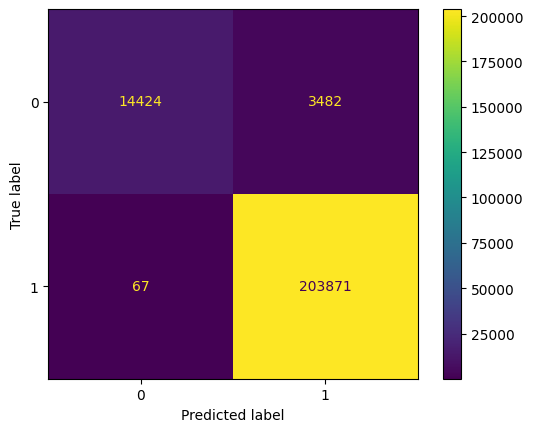

In [74]:
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_scaled, y_test,values_format='.0f')

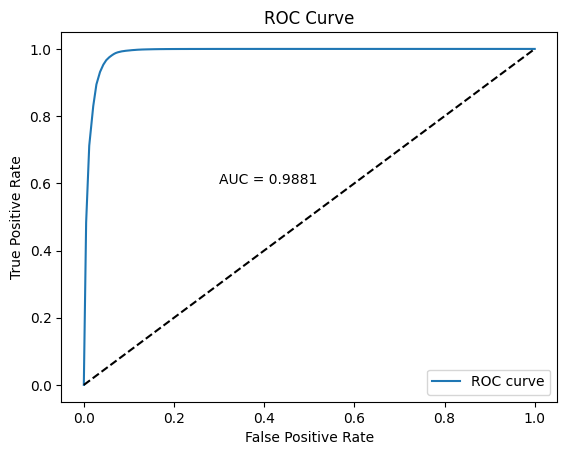

In [75]:
# Get predicted probabilities for the positive class (class 1) for the test set
y_score = clf.predict_proba(X_test_scaled)[:, 1]

# Compute the ROC curve (True Positive Rate vs False Positive Rate)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Compute the Area Under the Curve (AUC) score
metric_score = roc_auc_score(y_test, y_score)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')

# Plot a random guess line (45-degree line)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line

# Labels and title for the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Add AUC value as text annotation on the plot
plt.legend(loc='best')
plt.annotate('AUC = {:.4f}'.format(metric_score), (0.3, 0.6))

# Display the plot
plt.show()


In [76]:
# Compute the Detection Error Tradeoff (DET) curve
fpr, tpr, thresholds = det_curve(y_test, y_score)

# fpr[1] refers to the False Positive Rate at the second threshold
fpr[1]


0.37953758516698316

In [77]:
from imblearn.over_sampling import RandomOverSampler

In [78]:
ros = RandomOverSampler(random_state=10)

In [79]:
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled,y_train)

In [80]:
clf.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(class_weight='balanced', n_estimators=80,
                       random_state=10)

In [81]:
y_pred_new = clf.predict(X_test_scaled)

In [82]:
print(f"recall : {recall_score(y_test,y_pred_new)}")
print(f"precision : {precision_score(y_test,y_pred_new)}")
print(f"f1 : {f1_score(y_test,y_pred_new)}")

recall : 0.9992203512832332
precision : 0.9856013852076844
f1 : 0.9923641445942721


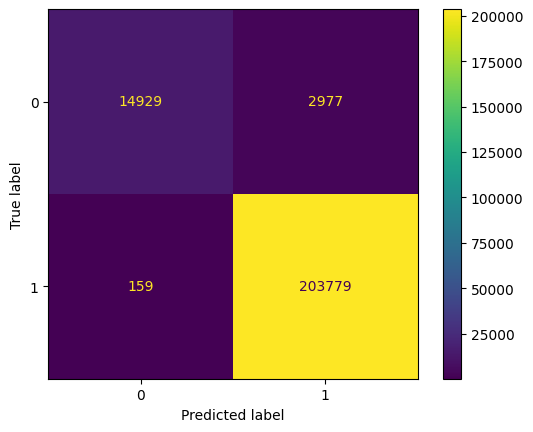

In [83]:
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_scaled, y_test,values_format='.0f')

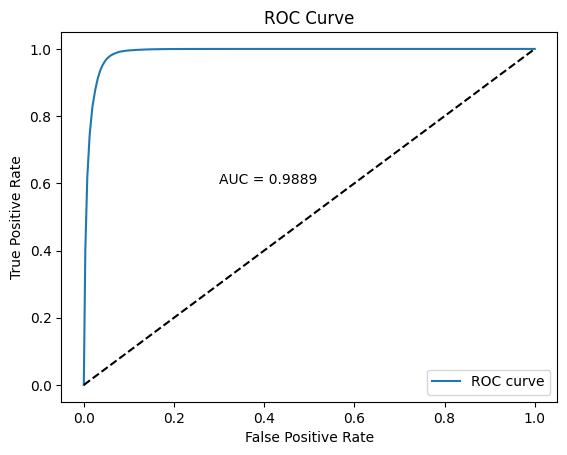

In [84]:
y_score_new = clf.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score_new)
metric_score = roc_auc_score(y_test, y_score_new)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.annotate('AUC = {:.4f}'.format(metric_score),(0.3,0.6))
plt.show()

In [85]:
fpr, tpr, thresholds = det_curve(y_test, y_pred_new)
fpr[1]

0.16625712051826202

We can improve the model's performance in predicting high-risk borrowers. However, in return the performance in predicting positive values is reduced. This may not sound good, but it is certainly better than classifying more high-risk borrowers as low-risk borrowers. To go further, the model can be improved to achieve greater profits. One step that might really need to be tried is a cost-sensitive classifier. A better model will certainly bring more profits to the company. Therefore, aspects that have a high impact, such as false positives in this case, need to be considered more deeply